# Linear Regression

## Application

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_theme()

df = pd.read_csv("palmer_penguins.txt")
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In this dataset, we have three species of penguins: Adelie, Gentoo and Chinstrap. The number of each species are  152, 124 and 68 respectively.

In [6]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Data Visualization

In this part, the scatter plot illustrates the correlation between various features and enables us to identify the key features that have the greatest impact on the classification in our model. We could see there exists significant linear relationship in some scatter plots.

/Users/celiajiang/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


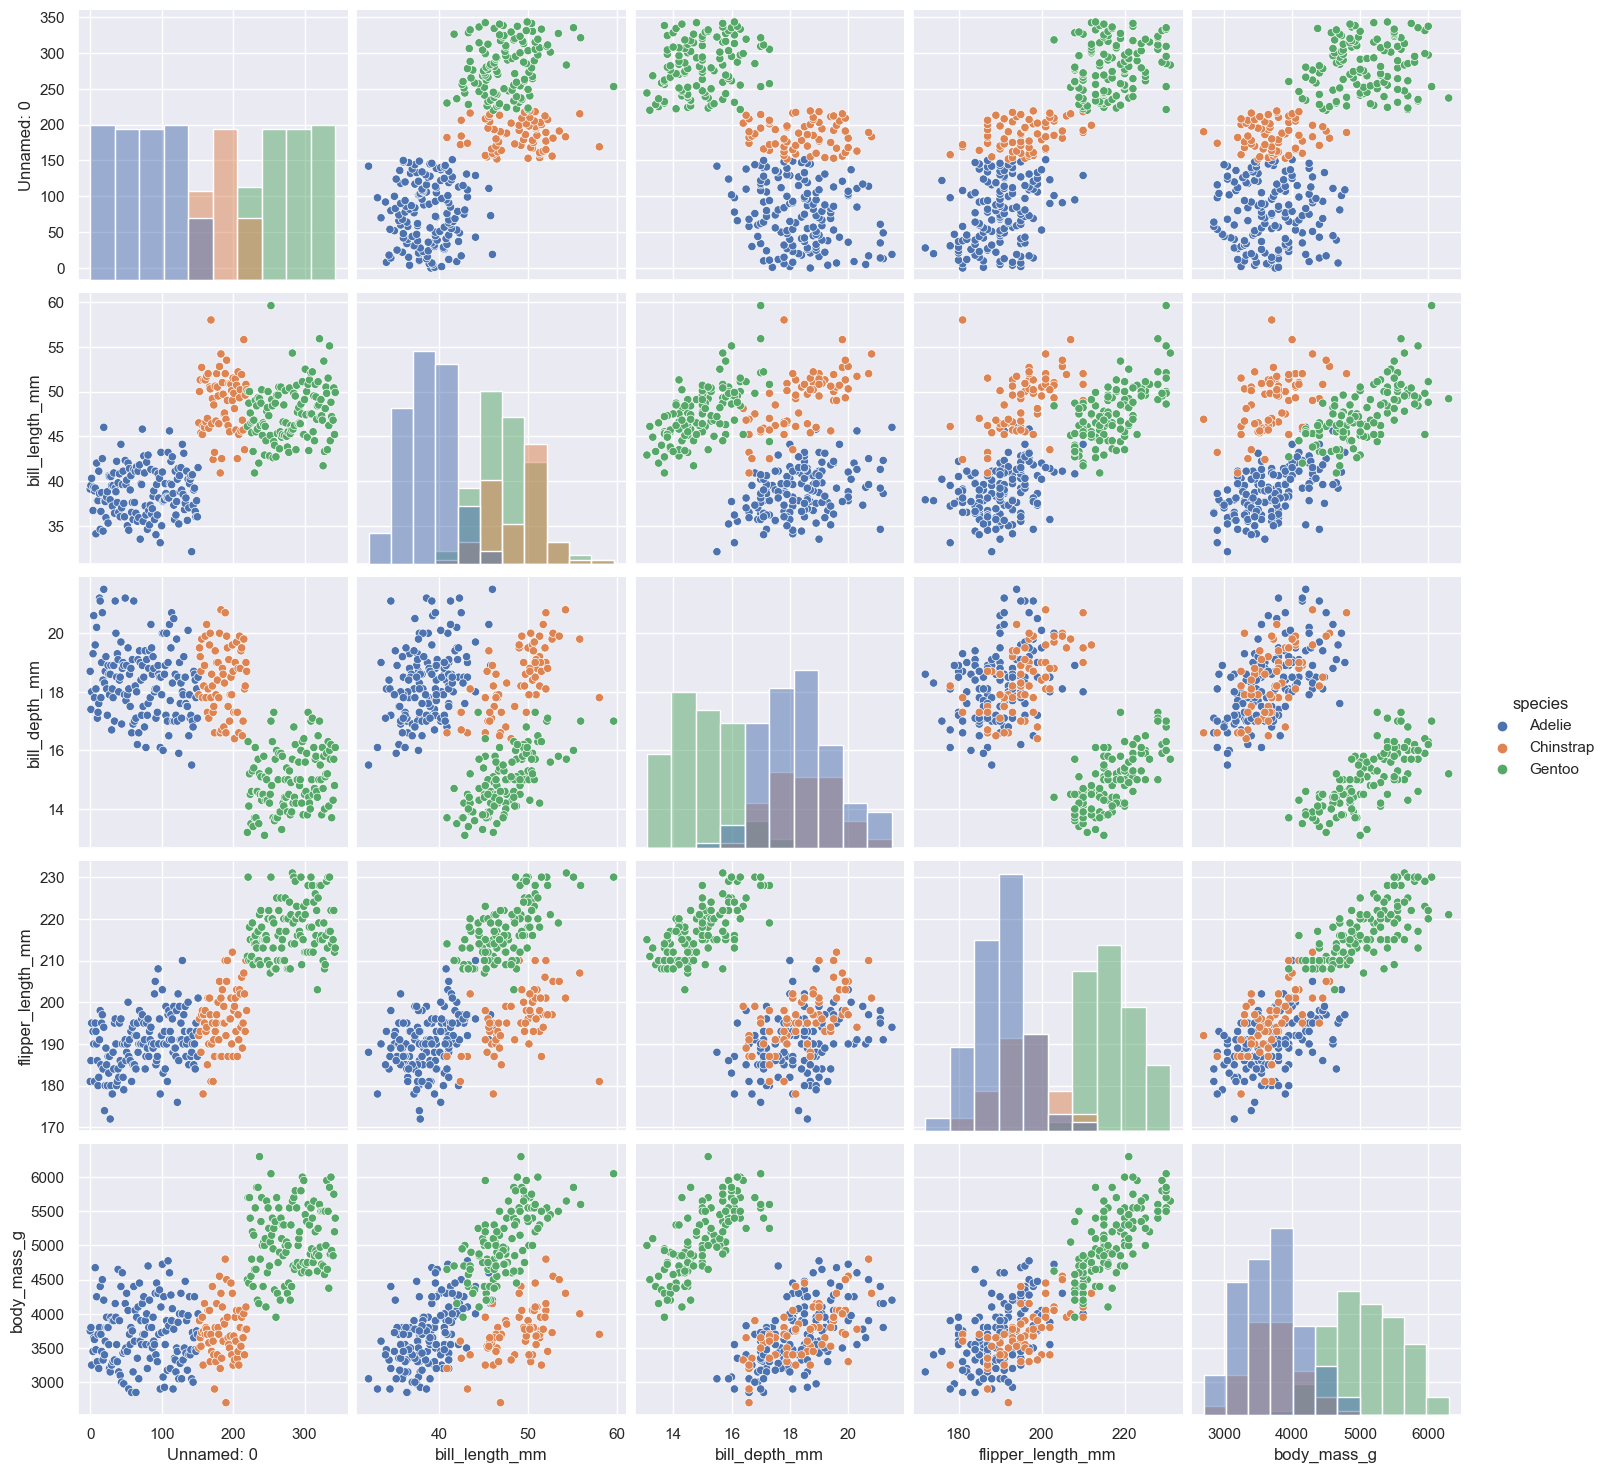

In [7]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

We choose bill_length as our independent variable, bill_depth as our dependent variable to build our linear model. According to the following plot, we could see there exists significant differences between different type of penguins. Therefore, we split the dataset by species to build the model.

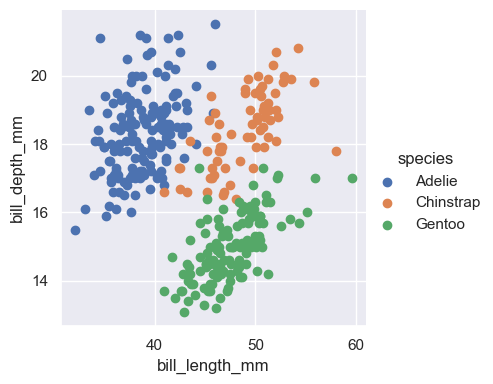

In [57]:
sns.FacetGrid(df, hue="species", height=4) \
   .map(plt.scatter, "bill_length_mm", "bill_depth_mm") \
   .add_legend()

### Linear Regression Single Neuron Model

We build the linear model on the Adelie penguin dataset.

In [8]:
Adelie = df[df["species"] == 'Adelie']
Adelie.head()

Adelie = Adelie.dropna(how = "any")
Adelie.drop("Unnamed: 0", axis = 1, inplace = True)
Adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


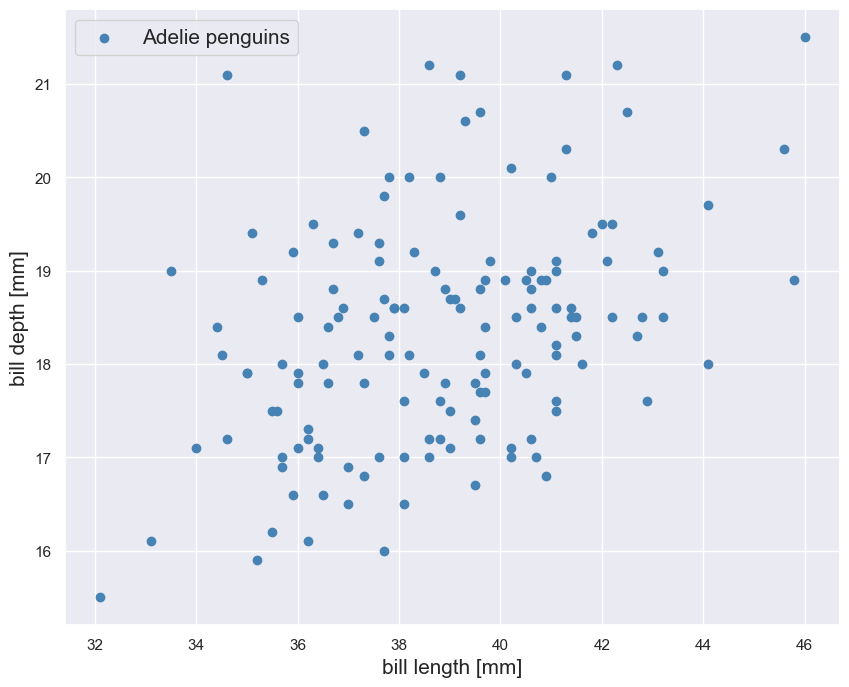

In [9]:
plt.figure(figsize = (10, 8))
plt.scatter(Adelie.bill_length_mm, 
            Adelie.bill_depth_mm, 
            color = "steelblue",
            label = "Adelie penguins")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [113]:
class LinearRegression:
    """
    A class to fit a linear regression model on the dataset applying gradient decent.

    Parameters
    ----------
    None

    Attributes
    ----------
    weights: numpy array
        Coefficients for the linear model.
    iterations: integer 
        denoting the maximum number of iterations allowed during model training 
    train_errors: list of floats
        Each entry in this list is an error calculated during training iterations
    equation: a string that formats the weight of the model into a linear regression equation
    
    """
    
    def __init__(self):
        """
        Initialize the LinearRegression object.
        """
        self.weights = None
        self.iterations = 0
        self.train_errors = []
        self.result = ""

    
    def train(self, X, y, rate=0.05, iterations=1000):
        """
        Build the linear model on the train dataset.

        Parameters
        ----------
        X : numpy.ndarray
            Matrix of feature values.
        y : numpy.ndarray
            Array of observed values.
        rate : float
            Learning rate for gradient decent.
        iterations : int
            Number of iterations to train the model.

        Returns
        ----------
        None

        """
        self.iterations = iterations
        n_obs, n_features = X.shape

        ### Initialize the weights for the linear model
        self.weights = np.random.rand(n_features + 1)
        
        # gradient decent
        for _ in range(iterations):
            total_error = 0
            for i in range(0, n_obs):
                err = self.predict(X[i,]) - y[i]
                self.weights -= rate * err * np.insert(X[i,], 0, 1)
                total_error += 0.5 * err**2
            self.train_errors.append(total_error / n_obs)
        
        # Display the equation for the model
        self.set_result()

    def set_result(self):
        eqn = f"y = {self.weights[0]:.3f}"
        for i in range(1, len(self.weights)):
            term = self.weights[i]
            if (np.sign(term) < 0):
                eqn += f" - {abs(term):.3f}x_{i}"
            else:
                eqn += f" + {term:.3f}x_{i}"
        self.result = eqn

    def mse(self, y_true, y_pred):
        """
        Apply it to calculate MSE for us to do the diagnosis.

        Parameters
        ----------
        y_true: true response value
        y_pred: predictions from the linear model
        
        Returns
        ----------
        MSE

        """
        rss = 0
        for i in range(0, len(y_true)):
            rss += (y_true[i] - y_pred[i])**2
        return rss/len(y_true)
    
    def loss_plot(self):
        """
        Plot the MSE per iteration
        """
        plt.figure(figsize = (8, 6))
        plt.plot(range(1, self.iterations + 1), self.train_errors)
        plt.xlabel("Iterations")
        plt.ylabel("MSE")
            
    def predict(self, X):
        """
        Obtain the predicted value by linear model

        Parameters
        ----------
        X: single numpy array of feature values

        Returns
        ----------
        Prediction value from the model
        """
        X = np.insert(X, 0, 1)
        return np.dot(X, self.weights)
    
     

In this part, we train our model and make predictions.

In [114]:
# Extract the predictor and target variables
X = Adelie[['bill_length_mm']].to_numpy()
y = Adelie['bill_depth_mm'].to_numpy()
# Set train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [116]:
# Train the model
model = LinearRegression()
model.train(X_train, y_train, 0.0001, 1000)

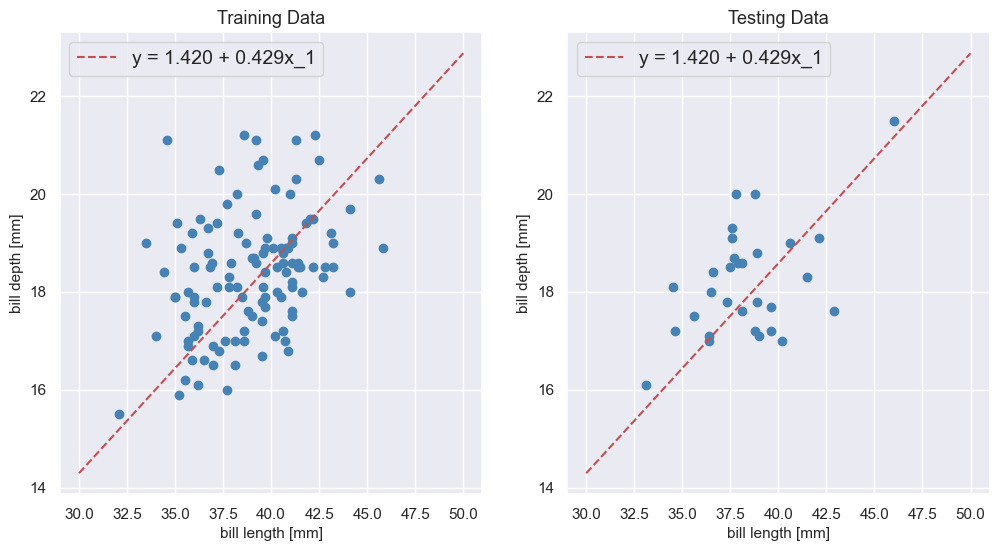

In [109]:
# Obtain the linear regression line
line_x = np.linspace(30, 50, 100)
line_y = model.weights[0] + model.weights[1]*line_x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
# Plot the training set
ax1.scatter(X_train, y_train, color = "steelblue")
ax1.set_xlabel("bill length [mm]", fontsize = 11)
ax1.set_ylabel("bill depth [mm]", fontsize = 11)
ax1.set_title("Training Data", fontsize = 13)
ax1.plot(line_x, line_y, '--r', label = model.result)
ax1.legend(fontsize = 14, loc = "upper left")

# Plot the testing set
ax2.scatter(X_test, y_test, color = "steelblue")
ax2.set_xlabel("bill length [mm]", fontsize = 11)
ax2.set_ylabel("bill depth [mm]", fontsize = 11)
ax2.set_title("Testing Data", fontsize = 13)
ax2.plot(line_x, line_y, '--r', label = model.result)
ax2.legend(fontsize = 14, loc = "upper left")
plt.show()

In [117]:
print(model.result)

y = 1.183 + 0.435x_1


According to the result above, we obtain the linear model for Adelie penguins. In the scatter plot, we could see the model fits both the train dataset and test dataset well. According to the MSE of the train dataset, the linear model has a good performance.

In [119]:
y_test_pred = [model.predict(x) for x in X_test]
mse = np.mean((y_test - y_test_pred) ** 2)
print("Test MSE:", mse)

Test MSE: 1.3410121579058367


We could also build model for other two types of penguins. The codes are not provided in this part, more explorations could be made. Besides, scikit-learn offers mature codes for linear regression.

### Conclusion
The single neuron gives a satisfactory result to the linear model, the MSE for the model is just 1.341.